In [6]:
pip install kaggle

In [7]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**importing face mask**


In [8]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


list the folders

In [10]:
!ls

data		       kaggle.json  test1.jpg  test4.jpg  test6.jpg   test.jpeg
face-mask-dataset.zip  sample_data  test3.jpg  test5.jpg  test7.jpeg


**importing the dependencies**


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3310.jpg', 'with_mask_2294.jpg', 'with_mask_2790.jpg', 'with_mask_1926.jpg', 'with_mask_1152.jpg']
['with_mask_1177.jpg', 'with_mask_1375.jpg', 'with_mask_2639.jpg', 'with_mask_1889.jpg', 'with_mask_2445.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1419.jpg', 'without_mask_714.jpg', 'without_mask_2334.jpg', 'without_mask_1998.jpg', 'without_mask_2733.jpg']
['without_mask_1807.jpg', 'without_mask_644.jpg', 'without_mask_2945.jpg', 'without_mask_1214.jpg', 'without_mask_1604.jpg']


In [14]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [15]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**displaying the images**

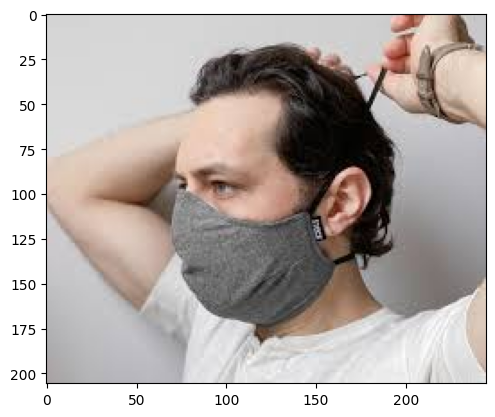

In [19]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2294.jpg')
imgplot = plt.imshow(img)
plt.show()

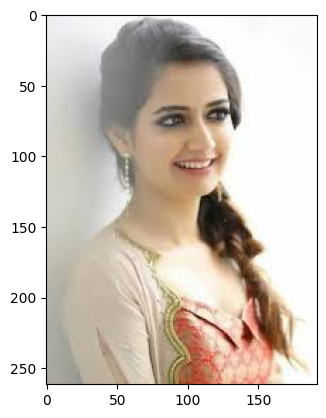

In [20]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1604.jpg')
imgplot = plt.imshow(img)
plt.show()

**image** **processing**

In [21]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
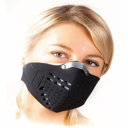

In [24]:
data[0]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

In [27]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [30]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [31]:
print(Y)

[1 1 1 ... 0 0 0]


**train test split**

In [32]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Scale the data
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

print(X.shape, X_train.shape, X_test.shape)


(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [33]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [34]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [249, 249, 250],
        [252, 252, 252],
        [253, 253, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [234, 234, 235],
        [239, 239, 241],
        [240, 239, 242]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 99,  89, 103],
        [108,  98, 112],
        [109,  98, 112]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [125, 120, 126],
        [130, 125, 131],
        [134, 129, 135]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [246, 246, 246]]], dtype=uint8)
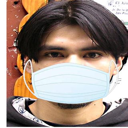

In [35]:
X_train[0]

In [36]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.97647059, 0.97647059, 0.98039216],
        [0.98823529, 0.98823529, 0.98823529],
        [0.99215686, 0.99215686, 0.99607843]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.91764706, 0.91764706, 0.92156863],
        [0.9372549 , 0.9372549 , 0.94509804],
        [0.94117647, 0.9372549 , 0.94901961]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1


**Building a Convolutional Neural Networks (CNN)**

In [38]:
# Define the model
import tensorflow.keras as keras
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/5
170/170 [==============================] - 10s 25ms/step - loss: 0.5341 - accuracy: 0.7811 - val_loss: 0.2933 - val_accuracy: 0.8793
Epoch 2/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2853 - accuracy: 0.8880 - val_loss: 0.2514 - val_accuracy: 0.9041
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2311 - accuracy: 0.9113 - val_loss: 0.2298 - val_accuracy: 0.9041
Epoch 4/5
170/170 [==============================] - 4s 24ms/step - loss: 0.2093 - accuracy: 0.9180 - val_loss: 0.2246 - val_accuracy: 0.9157
Epoch 5/5
48/48 [==============================] - 0s 9ms/step - loss: 0.2193 - accuracy: 0.9140
Test Accuracy = 0.9139642715454102


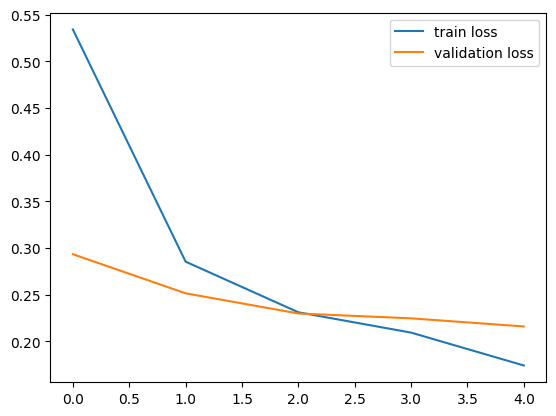

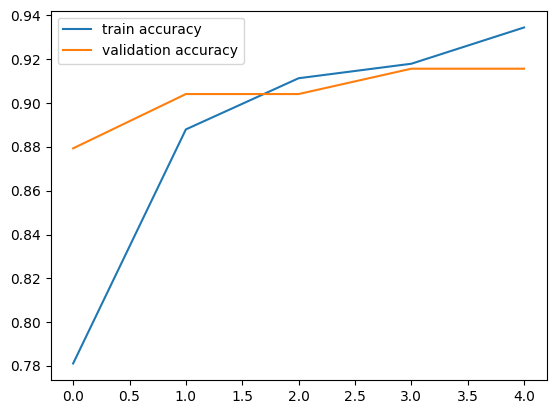

In [39]:
# Train the model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

# Plot training and validation loss and accuracy
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 7ms/step - loss: 0.2193 - accuracy: 0.9140
Test Accuracy = 0.9139642715454102


**predictive system**

Path of the image to be predicted: /content/test3.jpg


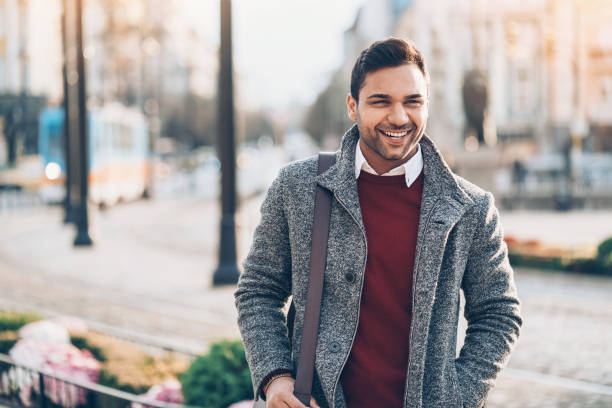

1/1 [==============================] - 0s 30ms/step
The person in the image is not wearing a mask


In [44]:
def predict_mask(input_image_path):
    input_image = cv2.imread(input_image_path)
    cv2_imshow(input_image)

    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')

# Example usage
input_image_path = input('Path of the image to be predicted: ')
predict_mask(input_image_path)


Path of the image to be predicted: /content/test1.jpg


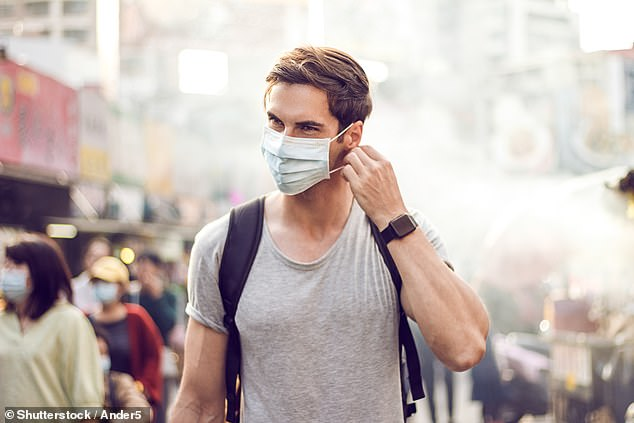

1/1 [==============================] - 0s 27ms/step
The person in the image is wearing a mask


In [42]:
def predict_mask(input_image_path):
    input_image = cv2.imread(input_image_path)
    cv2_imshow(input_image)

    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')

# Example usage
input_image_path = input('Path of the image to be predicted: ')
predict_mask(input_image_path)
